In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sklearn
from math import *
from prettytable import PrettyTable
from functools import partial
from decimal import Decimal
import sympy
import time

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决无法显示符号的问题
# palette = "deep"
# sns.set(font="Microsoft YaHei", font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [2]:
from mcm_cn2023.utils.util import *

In [3]:
beta = radians(120)
alpha = radians(1.5)
O = sympy.Point2D(0, 0)
A1 = O
C = sympy.Point2D(nm2m(4), tan(alpha) * nm2m(4))
斜坡 = sympy.Line2D(O, C)
海水总深度 = 110 - nm2m(2) * tan(alpha) + C.y

In [4]:
print(海水总深度)
print(C.x)

206.992653492269
7408


In [5]:
def aim(参考点A: sympy.Point2D):
    print("======================")
    A = 参考点A
    A到M的水平距离 = (海水总深度 - A.y) * tan(beta / 2)
    M = sympy.Point2D(
        A.x + A到M的水平距离,
        海水总深度,
    )

    右侧扫描线 = sympy.Line2D(
        M,
        (M.x + A到M的水平距离, A.y),
    )
    B = 斜坡.intersection(右侧扫描线)[0]

    AB = sqrt((A.x - B.x) ** 2 + (A.y - B.y) ** 2)
    print(f"AB.length: {float(AB)}")
    ANext = B - 斜坡.direction.unit * AB * 0.1
    return M, B, ANext, AB

In [6]:
def solve():
    ArrM = []

    ANext = A1
    while True:
        M, B, ANext, AB = aim(ANext)
        ArrM.append(M)
        print(f'B.x >= C.x {float(B.x)} {float(C.x)}')
        if B.x >= C.x:
            break
        
    return ArrM

In [7]:
test = solve()

AB.length: 686.1679951925146
B.x >= C.x 685.9328625579902 7408.0
AB.length: 632.5800002305992
B.x >= C.x 1249.7028071657494 7408.0
AB.length: 583.1770929209274
B.x >= C.x 1769.44373677575 7408.0
AB.length: 537.632428441807
B.x >= C.x 2248.594206742364 7408.0
AB.length: 495.6446877302711
B.x >= C.x 2690.324229893527 7408.0
AB.length: 456.93608398442365
B.x >= C.x 3097.556249026724 7408.0
AB.length: 421.25052485307674
B.x >= C.x 3472.9844715058325 7408.0
AB.length: 388.3519181537232
B.x >= C.x 3819.092693874592 7408.0
AB.length: 358.0226099095619
B.x >= C.x 4138.170734412483 7408.0
AB.length: 330.06194437209444
B.x >= C.x 4432.329582349427 7408.0
AB.length: 304.28493650223163
B.x >= C.x 4703.5153639648815 7408.0
AB.length: 280.5210481272079
B.x >= C.x 4953.5222179696475 7408.0
AB.length: 258.6130596767556
B.x >= C.x 5184.004165352839 7408.0
AB.length: 238.41603003366077
B.x >= C.x 5396.4860522235585 7408.0
AB.length: 219.7963376175231
B.x >= C.x 5592.373638044242 7408.0
AB.length: 202.63

In [8]:
df = pd.DataFrame()
df["res"] = list(map(lambda x: float(x.x), test))

df.T

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
res,358.521793,947.861718,1491.175678,1992.058184,2453.823025,2879.525194,3271.981093,3633.787174,3967.33711,4274.837634,...,6832.794653,6916.510149,6993.687675,7064.837831,7130.431338,7190.902157,7246.650357,7298.044763,7345.425396,7389.10572


In [9]:
dfT = df.T

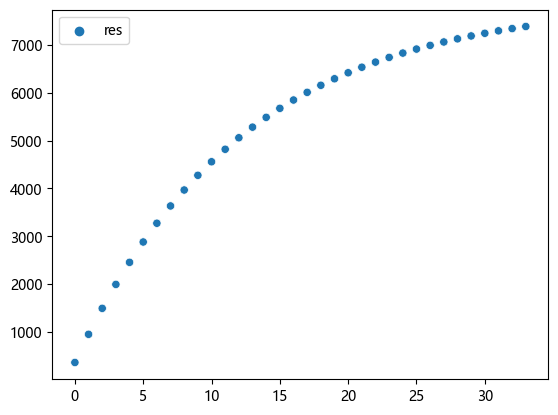

In [10]:
sns.scatterplot(df)
plt.show()

In [11]:
from mcm_cn2023.utils.convertEMF import exportEmf

Failed to get connection
** (inkscape:75072): CRITICAL **: 02:59:52.713: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:75072): CRITICAL **: 02:59:52.713: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:75072): CRITICAL **: 02:59:52.713: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


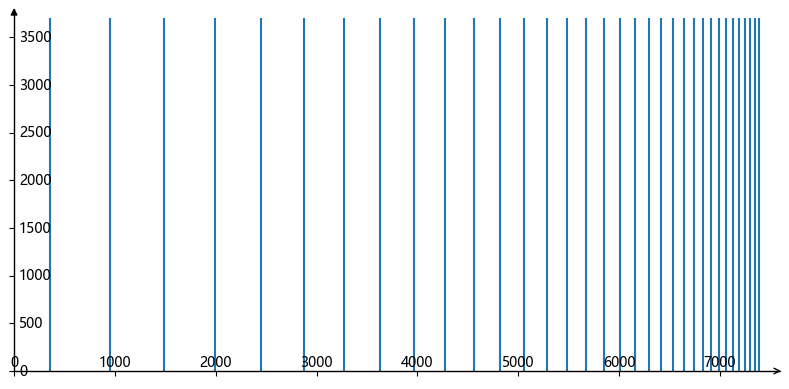

In [14]:
# 创建画布并引入axisartist工具。
import mpl_toolkits.axisartist as axisartist

# 创建画布
fig = plt.figure(figsize=(8, 4))
# 使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)
# 将绘图区对象添加到画布中
fig.add_axes(ax)

ax.axis[:].set_visible(False)  # 通过set_visible方法设置绘图区所有坐标轴隐藏
ax.axis["x"] = ax.new_floating_axis(0, 0)  # ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"].set_axisline_style("->", size=1.0)  # 给x坐标轴加上箭头
# 添加y坐标轴，且加上箭头
ax.axis["y"] = ax.new_floating_axis(1, 0)
ax.axis["y"].set_axisline_style("-|>", size=1.0)
# 设置x、y轴上刻度显示方向
ax.axis["x"].set_axis_direction("top")
ax.axis["y"].set_axis_direction("right")

# 设置x、y坐标轴的范围
plt.xlim(-1, nm2m(4) + 100)
plt.ylim(-1, nm2m(2) + 0)
# 绘制图形
list(map(lambda x: plt.axvline(x=x), df["res"]))
plt.tight_layout()
exportEmf('第三问ans')
plt.show()

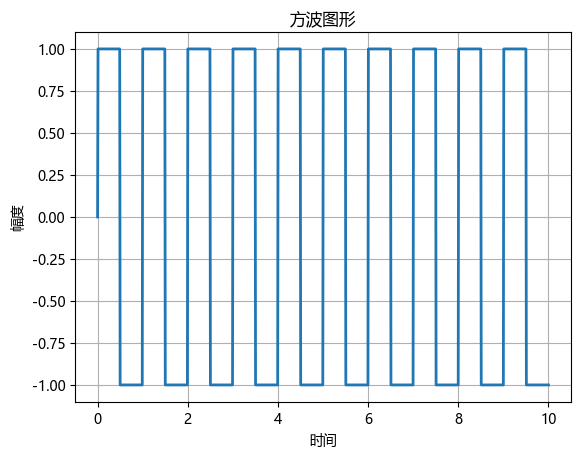

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个时间序列
t = np.linspace(0, 10, 1000)

# 生成方波信号
frequency = 1  # 方波的频率
amplitude = 1  # 方波的振幅
square_wave = amplitude * np.sign(np.sin(2 * np.pi * frequency * t))

# 绘制方波图形
plt.plot(t, square_wave, linewidth=2)
plt.title('方波图形')
plt.xlabel('时间')
plt.ylabel('幅度')
plt.grid(True)

# 显示图形
plt.show()
